# Figure 1

Replication of Arthur's results. A: flow diagram that illustrates the sequence of the main calculations in our implementation. B-Left: Average attendance per round for 100 agents over 100 rounds, aggregated across 50 simulation runs. The dashed line indicates the mean attendance across all rounds. B-Right: Average score per round, assuming a bar capacity of 60 agents and using a payoff function based on infrastructure congestion. The red dashed line represents the actual average score, while the black dashed line indicates the optimal average score.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from main import main
from config import PATHS


In [35]:
df = main(
    ks=[3],
    ds=[3],
    num_rounds=100,
    num_experiments=50,
    seed=42
)
df.head(2)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

,index,Memory,Num_predictors,Identifier,Round,Agent,Decision,Score,Policy,Prediction,Inaccuracy
0,0,3,3,0,0,0,1,1,2-cyclic,47,NaN
1,1,3,3,0,1,0,1,-1,2-cyclic,100,53.0


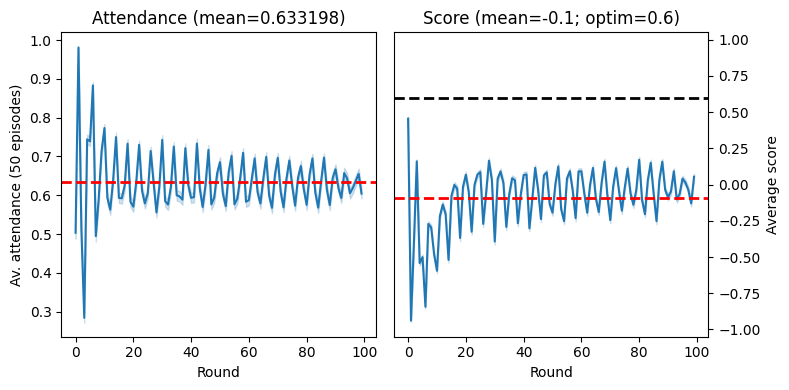

In [36]:
mean_attendance = df['Decision'].mean()
mean_score = df['Score'].mean()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.lineplot(x='Round', y='Decision', data=df, ax=axes[0])
axes[0].set_xlabel('Round')
axes[0].set_ylabel('Av. attendance (50 episodes)')
axes[0].axhline(y=mean_attendance, color='red', linestyle='--', linewidth=2)
axes[0].set_title(f"Attendance (mean={mean_attendance})")

sns.lineplot(x='Round', y='Score', data=df, ax=axes[1])
axes[1].set_xlabel('Round')
axes[1].set_ylabel('Average score')
axes[1].axhline(y=0.6, color='black', linestyle='--', linewidth=2) # Optimum score
axes[1].axhline(y=mean_score, color='red', linestyle='--', linewidth=2) # Mean score
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_title(f"Score (mean={round(mean_score,1)}; optim=0.6)")
axes[1].set_ylim([-1.05, 1.05])

fig.tight_layout()

In [37]:
file_name = PATHS['folder_figures_for_paper'] / 'Figure1.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')

---